In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
path = Path(Config.get_key('data_path')).expanduser()/'handwritten'
#bs = 4096
#tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, train='Train', valid='Validation', ds_tfms=tfms, size=32, bs=bs)
#learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [3]:
classes = ['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [4]:
#empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms()).normalize(imagenet_stats)
empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms())
learn = create_cnn(empty_data, models.resnet34)
# The model was created as DataParallel, therefore we need to load it as DataParallel for inference.
learn.model = torch.nn.DataParallel(learn.model)

In [5]:
learn.load('stage-2-resnet34-32px')

In [6]:
img_folder = path/'Validation/J'
img_path = path/'Validation/J/50.jpg'
#img_folder.ls()

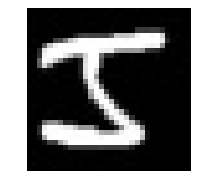

In [7]:
#img = open_image(data.train_ds.x[50000])
img = open_image(img_path)
img.show()

In [8]:
learn.predict(img)

('J',
 tensor(23),
 tensor([5.0915e-01, 6.7921e-01, 3.3920e-01, 7.6282e-02, 2.0044e+01, 1.2925e+00,
         2.4058e+00, 2.7680e-02, 9.9432e+02, 1.4533e-01, 2.1860e+00, 1.5286e-01,
         8.1559e-03, 1.8648e-02, 8.8276e-04, 9.5635e-01, 1.3836e-01, 1.1316e+00,
         8.4145e-01, 3.1691e+01, 2.3780e-02, 5.1446e-02, 3.8148e+02, 6.8944e+04,
         1.8652e+00, 5.0135e+01, 6.5295e-02, 2.4911e-02, 1.9939e-01, 2.1289e-02,
         1.0846e+00, 2.0734e+00, 2.3412e+02, 1.2138e+00, 2.7126e-01, 1.8726e-02,
         1.1717e+00, 9.7827e-01, 1.9378e+01]))

In [9]:
#! wget http://yourstorage.blob.core.windows.net/ficheros/e.png

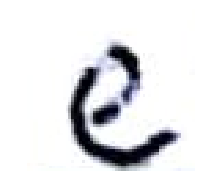

In [10]:
img = open_image("e.png")
img.show()

In [11]:
learn.predict(img)

('T',
 tensor(32),
 tensor([1.0580e+00, 6.7378e-01, 1.1900e+00, 3.0151e+01, 1.1550e+00, 7.5903e+00,
         5.9660e-01, 9.1403e-01, 1.1940e-01, 1.5945e-01, 2.9491e+00, 6.3246e-02,
         7.6829e-02, 1.8674e-01, 3.2650e-01, 2.4182e+00, 6.4433e+00, 1.1289e+01,
         9.0881e+00, 3.4065e+00, 1.4036e-02, 8.5021e-02, 1.3288e+01, 8.6918e+00,
         9.4362e-01, 3.1971e+00, 6.2158e-01, 2.2171e+00, 3.5839e+01, 2.2274e-01,
         5.9771e+00, 2.1479e-01, 8.9982e+01, 7.7744e-01, 4.9226e+00, 1.0818e+01,
         7.8822e-01, 1.1060e-01, 5.6203e+00]))

In [12]:
#! rm 4.png*
#! wget http://yourstorage.blob.core.windows.net/ficheros/4.png

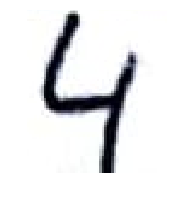

In [13]:
img = open_image("4.png")
img.show()

In [14]:
learn.predict(img)

('2',
 tensor(5),
 tensor([2.8651e+01, 7.8163e-01, 2.4273e+00, 9.3279e-04, 3.9651e+00, 4.6861e+02,
         2.9150e+00, 3.0312e-01, 8.4479e-01, 1.6170e-02, 2.0840e-01, 1.9164e-03,
         1.8348e+00, 3.2764e-01, 3.2780e+02, 3.8034e+00, 3.2383e-01, 2.8538e+00,
         3.8291e+00, 1.5664e-02, 2.5684e+00, 2.4984e+00, 6.2430e+00, 5.1964e+01,
         3.4403e-01, 8.5277e+00, 4.9288e+00, 2.1688e+01, 7.3078e-01, 5.4234e+00,
         1.5278e+02, 2.3193e+01, 1.1537e-02, 1.5025e-01, 5.3726e+00, 5.8060e+00,
         2.5256e-02, 8.1040e-01, 1.1062e+01]))

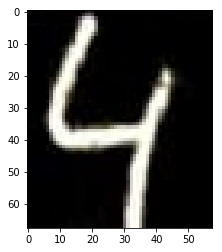

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('4.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [6]:
cv2.imwrite('4invert.png',img)

True

In [ ]:
learn.predict(img)